<br>

# **앙상블 기법 (Ensemble)**  

조화 또는 통일을 의미한다.  
지금까지는 예측을 할 때 하나의 모델만 사용해왔다. 하지만 여러개의 모델을 조화롭게 학습시켜 모델 들의 예측 결과들을 종합한다면 더 정확한 예측을 할 수 있다. 이것이 앙상블 기법이다.  
여러 모델들의 예측결과 보팅을 통해 최종 결과를 도출해낸다.   

> 보팅(Voting) : 여러 개의 분류기가 투표를 통해 최종 예측 결과를 결정하는 방식

앙상블 학습방법에는 배깅과 부스팅이 있다.   







## 배깅 (Bagging)

Bootstrap Aggregation의 약자로 데이터로부터 부트스트랩(랜덤복원추출)을 진행하여 모델을 학습시키고, 모델의 결과를 집계(Aggregating)하여 최종결과를 구하는 방법이다. 부트스트랩이란 동일한 크기의 샘플을 계속 복원추출하는 것이다. (중복가능)   

종속변수가 범주형인 분류모델의 경우에는 투표방식(보팅)으로 결과를 카운팅하여 한 표라도 더 나온 범주가 최종결과로 선택된다.   종속변수가 연속형인 예측모델은 각 결과의 평균으로 집계한다. 각각의 모델이 예측한 결과의 평균을 구해 최종 예측결과를 도출하는 것이다.   

만약 분류모델에서 동일한 투표수를 얻는다면? 
→ 500개 이상 분류기를 사용하기 때문에 확률적으로 결과가 동일하게 나올 가능성이 매우 적다. 그럼에도 불구하고 동일한 투표수가 나온다면?  
→ 홀수로 부여하는 등 파라미터를 조정하여 해결한다.  

배깅은 간단하면서도 성능이 우수한 방법이다. 배깅 기법을 활용한 대표적인 모델이 랜덤포레스트이다.  





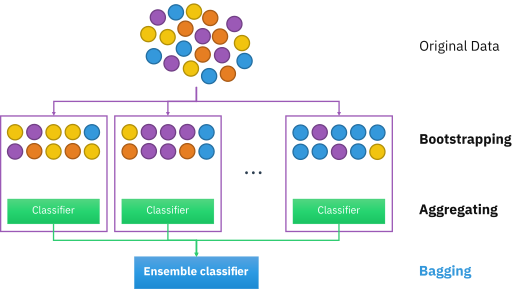




<br>

## 부스팅 (Boosting)  

부스팅은 가중치를 사용하여 분류기의 성능을 점점 높여가는 방법이다. 약한 분류기에서 강한 분류기로 성장시킨다.  

먼저 원본데이터에서 샘플링하여 학습을 한다. 물론 처음 결과는 좋지 않다. 만들어진 샘플의 일부에 가중치를 부여하여 새로운 샘플을 생성하고 새로운 샘플로 다시 학습하여 좀 더 나은 분류기를 만든다.  이러한 과정의 반복하다 보면 약했던 분류기는 성능이 향상되어 강한 분류기가 된다.  

모델은 순차적으로 학습되고 잘못 분류된 결과가 있더라도 가중치를 부여해 새로 학습하기 때문에 점점 성능이 향상된다.

가중치는 전 단계 모델의 예측결과에 따라 결정된다. 분류가 잘못된 데이터는 가중치를 높여주고, 분류가 잘 된 데이터는 가중치를 낮추어 부여한다. 잘못된 데이터의 경우 가중치를 부여함으로써 그 다음 단계의 모델에서 더 집중적으로 분류할 수 있게 된다.  

점점 모델의 성능이 점점 높아지면서 cost도 줄어들게 되고 그러다가 cost가 더 이상 줄어들지 않는 한계점에 도달할 수 있다.  

이러한 부스팅 방법의 모델로는 `AdaBoost`, `XGBooster`, `LGB`가 있다.


<br>

부스팅은 배깅에 비해 성능이 우수하다. 다만 배깅보다 속도가 느리고 과적합이 발생할 가능성이 크다.

정확도(성능)를 생각한다면 부스팅, 과적합이 우려된다면 배깅 사용하는 것이 좋다. 목적에 맞게 선택하도록 한다.  







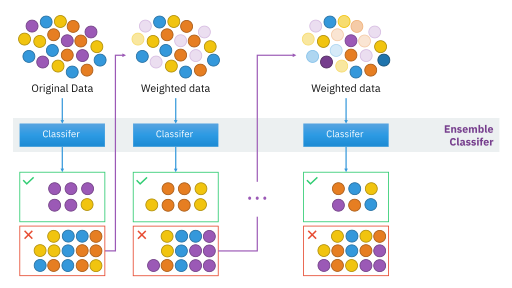

이미지출처 : https://data-matzip.tistory.com/entry/%EC%95%99%EC%83%81%EB%B8%94-%EA%B8%B0%EB%B2%95-%EC%A0%95%EB%A6%AC-1-%EC%95%99%EC%83%81%EB%B8%94Ensemble-%EA%B8%B0%EB%B2%95%EA%B3%BC-%EB%B0%B0%EA%B9%85Bagging-%EB%B6%80%EC%8A%A4%ED%8C%85Boosting-%EC%8A%A4%ED%85%8C%EC%9D%B4%ED%82%B9Stacking

<br>

# 🚀 **XGBoost**



In [ ]:
!pip install xgboost
!pip install lightgbm

<br>

# XGBoost로 분류모델 작성 - 암 확진 여부 판단  


In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import plot_importance
import xgboost as xgb
from lightgbm import LGBMClassifier
import matplotlib.pyplot as plt

In [ ]:
dataset = load_breast_cancer()
print(dataset.keys())

x_features = dataset.data
y_labels = dataset.target
print(dataset.feature_names)

cancer_df = pd.DataFrame(data=x_features, columns=dataset.feature_names)
pd.set_option('max_columns', None)
print(cancer_df.head(3), cancer_df.shape)
print()

print(y_labels[:5], set(y_labels))
print(dataset.target_names)
print(np.sum(y_labels==0)) #malignant 악성
print(np.sum(y_labels==1)) #benign 양성

#train, test
x_train, x_test, y_train, y_test = train_test_split(x_features, y_labels, test_size=0.2, random_state=1)
print(x_train.shape, ' ', x_test.shape)

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38           122.8     1001.0          0.11840   
1        20.57         17.77           132.9     1326.0          0.08474   
2        19.69         21.25           130.0     1203.0          0.10960   

   mean compactness  mean concavity  mean concave points

<br>

## 모델 작성



<br>

### 3. `RandomForestClassifier()`

In [ ]:
model = RandomForestClassifier(n_estimators=500, criterion='entropy').fit(x_train, y_train)
print(model)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


<br>

### 2. `XGBClassifier()`

데이터의 양이 아주 많을 경우에는 다른 모델보다 약간 유리한 면이 있다.  


In [ ]:
model = xgb.XGBClassifier(booster='gbtree', max_depth=6, n_estimators=500).fit(x_train, y_train)  #booster='gbtree': 분류
print(model)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


<br>

### 3. `LGBMClassifier()`


In [ ]:
model = LGBMClassifier(booster='gbtree', max_depth=6, n_estimators=500).fit(x_train, y_train)
print(model)

LGBMClassifier(booster='gbtree', boosting_type='gbdt', class_weight=None,
               colsample_bytree=1.0, importance_type='split', learning_rate=0.1,
               max_depth=6, min_child_samples=20, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=500, n_jobs=-1, num_leaves=31,
               objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)


<br>

## 정확도 확인하기 


In [ ]:
pred = model.predict(x_test)
print('pred 결과:', pred[:10])
print('실제값:', y_test[:10])

#정확도
from sklearn import metrics
acc = metrics.accuracy_score(y_test, pred)
print('acc:', acc)

cl_rep = metrics.classification_report(y_test, pred)
print('cl_rep:\n', cl_rep)

pred 결과: [1 0 1 0 0 0 0 0 1 1]
실제값: [1 0 1 0 0 0 0 0 1 1]
acc: 0.9649122807017544
cl_rep:
               precision    recall  f1-score   support

           0       1.00      0.90      0.95        42
           1       0.95      1.00      0.97        72

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



<br>

## 특성중요도 시각화  

`XGBClassifier()` 모델만 가능하다. 


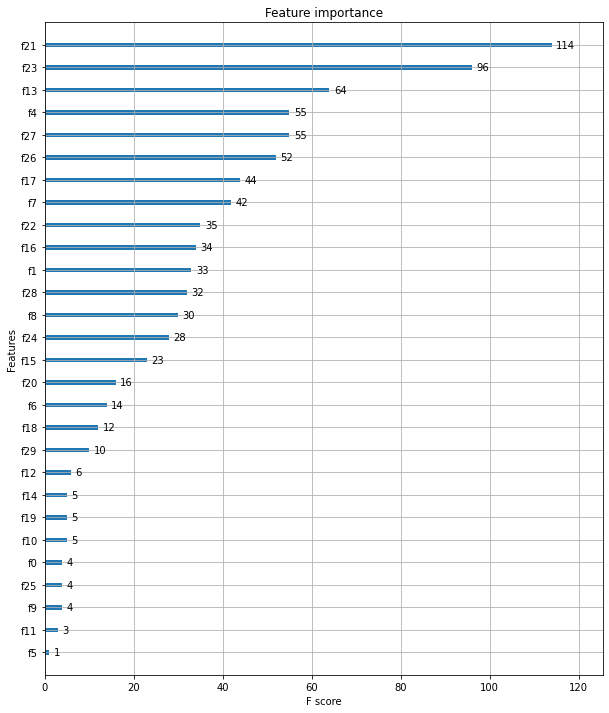

In [ ]:
fig, ax = plt.subplots(figsize=(10,12))
plot_importance(model, ax=ax)
plt.show()


학습 시 feature명을 정확히 알 수 없기 때문에 `f번호` 형식으로 표현된다.  



<br>

# XGBoost 실습 - iris dataset 


In [ ]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

iris = datasets.load_iris()

x = iris.data[:, [2,3]]  #petal.length, petal.width
y = iris.target
print(x[:3])
print(y[:3], set(y))

#train, test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0) 
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

[[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]]
[0 0 0] {0, 1, 2}
(105, 2) (45, 2) (105,) (45,)


<br>

## `XGBClassifier()`

In [ ]:
import xgboost as xgb

model = xgb.XGBClassifier(booster='gbtree', max_depth=4, n_estimators=500)
model.fit(x_train, y_train)

#분류 예측
y_pred = model.predict(x_test)
print('예측값:', y_pred)
print('실제값:', y_test)
print('총 개수: %d, 오류수: %d'%(len(y_test), (y_test != y_pred).sum()))
print()

print('분류정확도 확인 1:')
print('%.3f'%accuracy_score(y_test, y_pred))

print('분류정확도 확인 2:')
con_mat = pd.crosstab(y_test, y_pred, rownames=['예측치'], colnames=['관측치'])
#print(con_mat)
print((con_mat[0][0] + con_mat[1][1] + con_mat[2][2])/len(y_test))

print('분류정확도 확인3:')
print('train:', model.score(x_train, y_train))
print('test:', model.score(x_test, y_test))
print()

print(x_test[:3])
new_data = np.array([[5.1, 2.4], [0.3, 0.3], [3.4, 0.2]])
new_pred = model.predict(new_data)
print('예측결과:', new_pred)

예측값: [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2 1 1 2 0 2 0 0]
실제값: [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1 1 1 2 0 2 0 0]
총 개수: 45, 오류수: 1

분류정확도 확인:
0.978
[[5.1 2.4]
 [4.  1. ]
 [1.4 0.2]]
예측결과: [2 0 1]


<br>

## 시각화 


In [ ]:
#그래프를 위한 글꼴설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 40 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 3s (3,381 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 160837 files and d

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
findfont: Font family ['NanumBarunGothic'] not

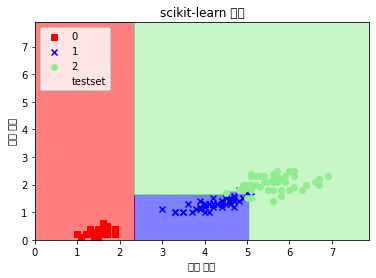

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

def plot_decision_region(X, y, classifier, test_idx=None, resolution=0.02, title=''):
    markers = ('s', 'x', 'o', '^', 'v')  # 점 표시 모양 5개 정의
    colors = ('r', 'b', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    #print('cmap : ', cmap.colors[0], cmap.colors[1], cmap.colors[2])

    # decision surface 그리기
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    xx, yy = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))

    # xx, yy를 ravel()를 이용해 1차원 배열로 만든 후 전치행렬로 변환하여 퍼셉트론 분류기의 
    # predict()의 인자로 입력하여 계산된 예측값을 Z로 둔다.
    Z = classifier.predict(np.array([xx.ravel(), yy.ravel()]).T)
    Z = Z.reshape(xx.shape)   # Z를 reshape()을 이용해 원래 배열 모양으로 복원한다.
    
    # X를 xx, yy가 축인 그래프 상에 cmap을 이용해 등고선을 그림
    plt.contourf(xx, yy, Z, alpha=0.5, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    X_test = X[test_idx, :]
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], c=cmap(idx), marker=markers[idx], label=cl)

    if test_idx:
        X_test = X[test_idx, :]
        plt.scatter(X_test[:, 0], X_test[:, 1], c=[], linewidth=1, marker='o', s=80, label='testset')

    plt.xlabel('꽃잎 길이')
    plt.ylabel('꽃잎 너비')
    plt.legend(loc=2)
    plt.title(title)
    plt.show()

x_combined_std = np.vstack((x_train, x_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_region(X=x_combined_std, y=y_combined, classifier=model, test_idx=range(105, 150), title='scikit-learn 제공')

<br>

## ROC Curve 작성  

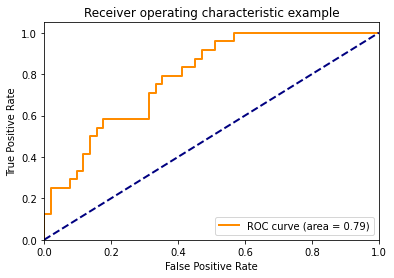

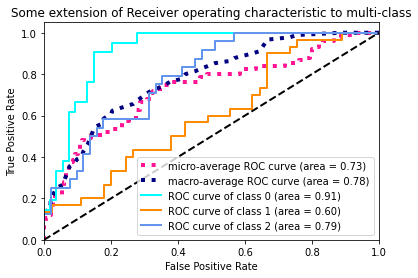

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=0)


# Learn to predict each class against the other
# OneVsOneClassifier 클래스를 사용하면 이진 클래스용 모형을 OvO 방법으로 다중 클래스용 모형으로 변환한다. 
# OneVsOneClassifier 클래스는 각 클래스가 얻는 조건부 확률값을 합한 값을 decision_function으로 출력한다.
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True, random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
# 사이킷런 패키지는  roc_curve 명령을 제공한다. 
# 인수로는 타겟 y 벡터와 판별함수 벡터(혹은 확률 벡터)를 넣고 결과로는 변화되는 기준값과 그 기준값을 사용했을 때의 재현율을 반환한다.
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())

# AUC(Area Under the Curve)는 ROC curve의 면적을 뜻한다. 
# 위양성률(fall out)값이 같을 때 재현률값이 클거나 재현률값이 같을 때 위양성률값이 작을수록 AUC가 1에 가까운 값이고 좋은 모형이다.
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

#Plot of a ROC curve for a specific class
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# Plot ROC curves for the multiclass problem
# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)

for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])


# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"], label='micro-average ROC curve (area = {0:0.2f})'''.format(roc_auc["micro"]), 
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"], label='macro-average ROC curve (area = {0:0.2f})'''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)


from itertools import cycle
# iterable에서 요소를 반환하고 각각의 복사본을 저장하는 반복자를 만든다. 반복 가능한 요소가 모두 소모되면 저장된 사본에서 요소를 리턴한다. 
# 반복 가능한 요소가 모두 소모될때까지 무한정 반복한다.

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw, label='ROC curve of class {0} (area = {1:0.2f})'''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

<br>

# 📝 `GridSearchCV` - 하이퍼 파라미터 튜닝  

과적합 방지를 위해 `GridSearchCV`를 적용하여 최적의 파라미터 값을 찾아보자.  


Kaggle의 Santander Customer Satisfaction dataset을 사용하였다.  
feature names가 익명이다.  

Santander 은행 고객 데이터로 고객만족여부에 대한 XGBoost 분류 모델을 작성하자.  


<br>

## 데이터 전처리 


In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/testdata/san_train.csv', encoding='latin-1')
#print(df.head(2))
print(df.shape)
print(df.info())
#print(df.describe())

#이상치 대체
df['var3'].replace(-999999, 2, inplace=True)
#print(df.describe())

#print(df['TARGET'].value_counts())  #0:만족, 1:불만족
unsatisfied_cnt = df[df['TARGET']==1].TARGET.count()
total_cnt = df.TARGET.count()
print('고객의 불만족 비율:{0:.2f}', unsatisfied_cnt/total_cnt)

df.drop('ID', axis=1, inplace=True)

x_features = df.iloc[:, :-1]
y_labels = df.iloc[:,-1]
#print(x_features[:1])
print(x_features.shape)
print(y_labels[:1])

(76020, 371)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB
None
고객의 불만족 비율:{0:.2f} 0.0395685345961589
(76020, 369)
0    0
Name: TARGET, dtype: int64



var3 컬럼의 minimum 값이 -999999.000000로 편차가 굉장히 크다. 이상치를 제거해주자. 




In [ ]:
#train, test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_features, y_labels, test_size=0.2, random_state=0)
train_cnt = y_train.count()
test_cnt = y_test.count()
print('train shape:{0}, test shape:{1}'.format(x_train.shape, x_test.shape))
print('train set 레이블 값 분포 비율:\n', y_train.value_counts() / train_cnt)
print('test set 레이블 값 분포 비율:\n', y_test.value_counts() / test_cnt)

train shape:(60816, 369), test shape:(15204, 369)
train set 레이블 값 분포 비율:
 0    0.960964
1    0.039036
Name: TARGET, dtype: float64
test set 레이블 값 분포 비율:
 0    0.9583
1    0.0417
Name: TARGET, dtype: float64


데이터를 분류한 후의 레이블 값의 분포가 원본데이터와 유사한 것을 확인할 수 있다.  


<br>

## XGBoost 모델 생성 및 평가 


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

#모델 작성
xgb_clf = XGBClassifier(n_estimators=10, random_state=12)  #다른 파라미터값 생략
print(xgb_clf)

#학습
#xgb_clf.fit(x_train, y_train)
#xgb_clf.fit(x_train, y_train, eval_metric='auc', eval_set=[(x_train, y_train), (x_test, y_test)])  #진행과정확인. n_estimators 회수만큼 출력
xgb_clf.fit(x_train, y_train, early_stopping_rounds=2,
            eval_metric='auc', eval_set=[(x_train, y_train), (x_test, y_test)])  #조기중단

#평가
xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(x_test)[:,1])  
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=30, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=12,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
[0]	validation_0-auc:0.799928	validation_1-auc:0.803548
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 5 rounds.
[1]	validation_0-auc:0.802222	validation_1-auc:0.805222
[2]	validation_0-auc:0.80819	validation_1-auc:0.813162
[3]	validation_0-auc:0.8127	validation_1-auc:0.813243
[4]	validation_0-auc:0.81648	validation_1-auc:0.816979
[5]	validation_0-auc:0.816018	validation_1-auc:0.816629
[6]	validation_0-auc:0.816474	validation_1


`early_stopping_rounds=5`: 조기중단 설정. 동일한 값이 5개 이상 나온다면 중단한다.  

sklearn과 텐서플로우와는 서로 기준값이 다르므로 설정하는 수치가 많이 달라진다.  

<br>

## 하이퍼 파라미터 튜닝 

튜닝 시 두 세개의 파라미터를 먼저 조정하여 본다. 전체 파라미터를 한꺼번에 조정하면 속도가 매우 느려지게 된다.  

다음 세 가지 파라미터를 튜닝해보자. 

`max_depth`: 트리의 최대 깊이, 0을 지정하면 제한없음. 너무 크면 과적합이 발생할 수 있다. (보통 3~10 정도). 범위는 0 ~ ∞.  
`min_child_weight`: 관측치에 대한 가중치의 최소합? 기본값은 1.  
`colsample_bytree`: 트리 생성에 필요한 피처의 샘플링에 사용
- 피처가 많을 때 과적합 조절에 사용함. 범위는 0 ~ 1

In [ ]:
from sklearn.model_selection import GridSearchCV

xgb_clf = XGBClassifier(n_estimators=10) #테스트를 위해 10정도만 부여함 

params = {'max_depth':[5,7], 'min_child_weight':[1,3], 'colsample_bytree':[0.5,0.7]}
gridcv = GridSearchCV(xgb_clf, param_grid = params)
gridcv.fit(x_train, y_train, early_stopping_rounds=2, eval_metric='auc', eval_set=[(x_train,y_train), (x_test,y_test)])
print('GridSearchCV 최적의 파라미터:', gridcv.best_params_)

grid_roc_score = roc_auc_score(y_test, gridcv.predict_proba(x_test)[:,1], average='macro')  
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.716371	validation_1-auc:0.721224
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 2 rounds.
[1]	validation_0-auc:0.808233	validation_1-auc:0.811497
[2]	validation_0-auc:0.804883	validation_1-auc:0.804536
[3]	validation_0-auc:0.815261	validation_1-auc:0.81637
[4]	validation_0-auc:0.825247	validation_1-auc:0.824507
[5]	validation_0-auc:0.819668	validation_1-auc:0.820074
[6]	validation_0-auc:0.818989	validation_1-auc:0.819519
Stopping. Best iteration:
[4]	validation_0-auc:0.825247	validation_1-auc:0.824507

[0]	validation_0-auc:0.720563	validation_1-auc:0.726405
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 2 rounds.
[1]	validation_0-auc:0.813613	validation_1-auc:0.811546
[2]	validation_0-auc:0.809269	validation_1-auc:0.80917
[3]	validation_0-auc:0.81672	validation_1-auc:0

<br>

## 최적의 파라미터값으로 모델 작성 


In [ ]:
xgb_clf2 = XGBClassifier(n_estimators=10, max_depth=7, min_child_weight=1, colsample_bytree=0.5, 
                        learning_rate=0.02, reg_alpha=0.03, random_state=12)  
print(xgb_clf2)

#학습
xgb_clf2.fit(x_train, y_train, early_stopping_rounds=2,
            eval_metric='auc', eval_set=[(x_train, y_train), (x_test, y_test)])  #조기중단

#평가
xgb_roc_score2 = roc_auc_score(y_test, xgb_clf2.predict_proba(x_test)[:,1])  
print('ROC AUC: {0:.4f}'.format(xgb_roc_score2))

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0,
              learning_rate=0.02, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=None, n_estimators=10, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=12,
              reg_alpha=0.03, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
[0]	validation_0-auc:0.809827	validation_1-auc:0.805946
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 2 rounds.
[1]	validation_0-auc:0.803929	validation_1-auc:0.806498
[2]	validation_0-auc:0.826871	validation_1-auc:0.820467
[3]	validation_0-auc:0.821651	validation_1-auc:0.815857
[4]	validation_0-auc:0.828993	validation_1-auc:0.824007
[5]	validation_0-auc:0.832065	validation_1-auc:0.826431
[6]	validation_0-auc:0.831085	va


`learning_rate`를 적절하게 적용하는 것은 전적으로 연구자의 능력이다.   
`reg_alpha`: L1 Regularization 적용 값. features의 수가 많을 때 적용을 검토한다. 클수록 과적합 감소 효과.  

해당 예제에서는 정확도가 떨어졌지만 많은 경우에 `GridSearchCV`로 찾은 최적의 파라미터를 적용하면 정확도가 향상된다.  



<br>

## 특성 중요도 시각화 


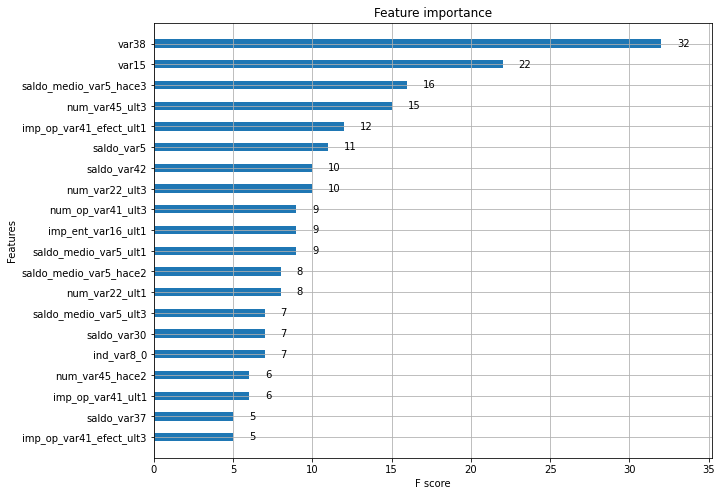

In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(10,8))
plot_importance(xgb_clf2, ax=ax, height=0.4, max_num_features=20)
plt.show()

<br>

## 의사결정나무 시각화 


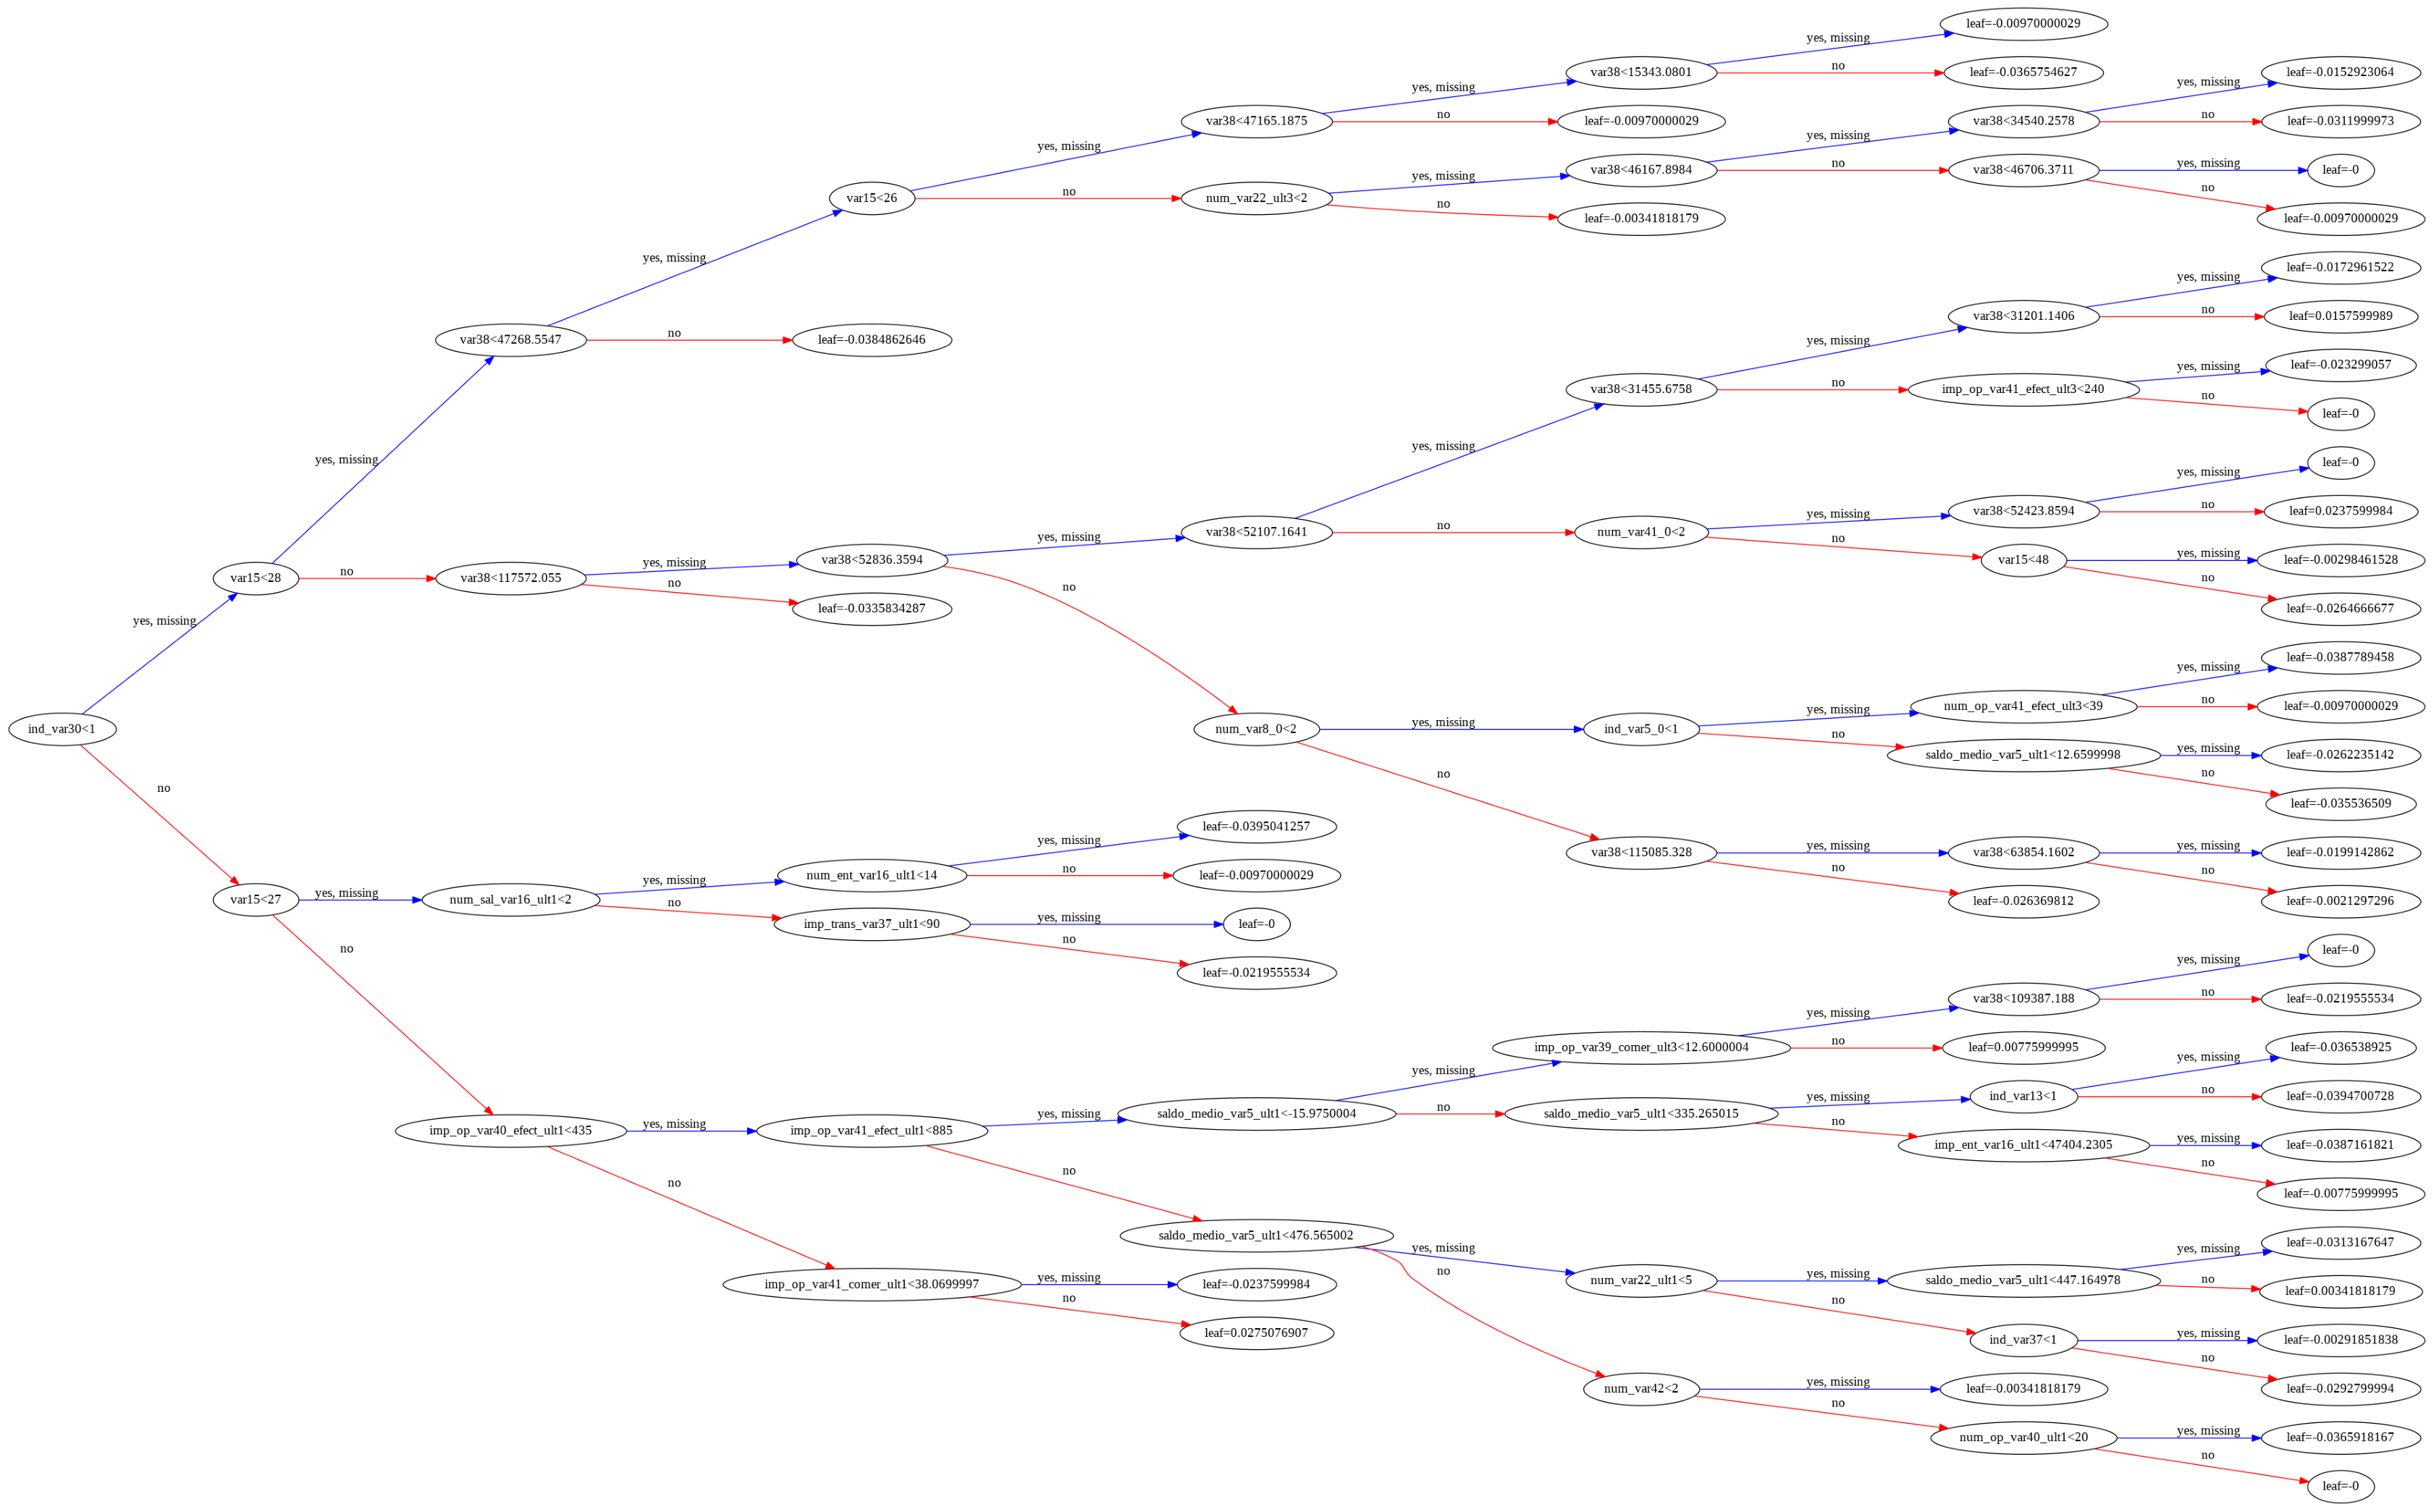

In [ ]:
import xgboost as xgb

xgb.plot_tree(xgb_clf2, num_trees=0, rankdir='LR')
fig = plt.gcf()
fig.set_size_inches(60,50)
fig.savefig('xgtree.png')
plt.show()

예제에서는 파라미터 값만 조정했지만 feature의 개수 조정도 필요하다.  



<br>

## 모델을 파일로 저장하고 읽기 


In [ ]:
import pickle

pickle.dump(xgb_clf2, open('xgbmodel.sav','wb'))
model = pickle.load(open('xgbmodel.sav','rb'))
print(model.predict(x_test[:5]))
print(model.predict_proba(x_test[:5]))
print(y_test[:5].values)

[0 0 0 0 0]
[[0.5559483  0.44405168]
 [0.5527097  0.44729033]
 [0.555273   0.444727  ]
 [0.5559483  0.44405168]
 [0.5521945  0.4478055 ]]
[0 0 0 0 0]


<br>

references:  
https://becominghuman.ai/ensemble-learning-bagging-and-boosting-d20f38be9b1e  
https://bkshin.tistory.com/entry/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-11-%EC%95%99%EC%83%81%EB%B8%94-%ED%95%99%EC%8A%B5-Ensemble-Learning-%EB%B0%B0%EA%B9%85Bagging%EA%B3%BC-%EB%B6%80%EC%8A%A4%ED%8C%85Boosting   
https://statkclee.github.io/model/model-python-xgboost-hyper.html  
https://injo.tistory.com/44  
http://machinelearningkorea.com/2019/09/29/lightgbm-%ED%8C%8C%EB%9D%BC%EB%AF%B8%ED%84%B0/  